In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# use flare table from Pineda et al. in prep.
df = pd.read_csv("data/2021_12_08_flares.csv")
df = df[df.real=="1"]
df.head()

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,tstamp,dur_detrend,real
5,13523.0,13530.0,243013.0,243020.0,1564.978889,1564.988611,55.696179,3.928268,0.124217,0.009722,16035,1539914,9,01_12_2021_16_58_28,19.680489,1
6,2724.0,2738.0,230798.0,230812.0,1548.013584,1548.033029,152.094714,5.259690,0.224345,0.019445,16035,1539914,9,01_12_2021_16_58_28,19.680489,1
8,1247.0,1252.0,248546.0,248551.0,1572.663788,1572.670732,33.023852,2.285862,0.097613,0.006945,15734,2470992,10,01_12_2021_16_59_24,17.802888,1
9,10142.0,10149.0,259509.0,259516.0,1587.890238,1587.899960,91.330193,2.346427,0.286523,0.009722,15734,2470992,10,01_12_2021_16_59_24,17.802888,1
10,10455.0,10477.0,259822.0,259844.0,1588.324956,1588.355512,533.533795,4.182289,1.075059,0.030555,15734,2470992,10,01_12_2021_16_59_24,17.802888,1


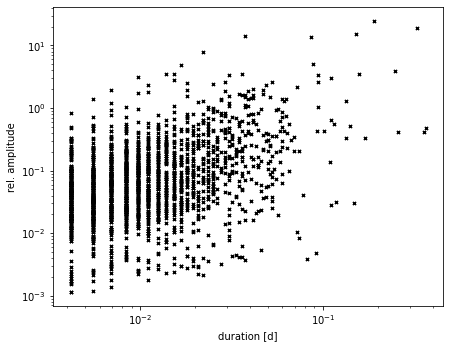

In [26]:
%matplotlib inline
plt.figure(figsize=(7,5.5))
plt.scatter(df.dur, df.ampl_rec,marker="x",s=10, c="k")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("duration [d]")
plt.ylabel("rel. amplitude");

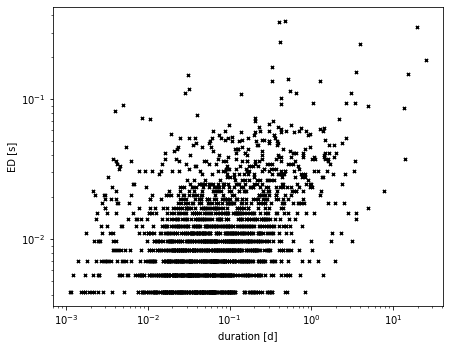

In [68]:
%matplotlib inline
plt.figure(figsize=(7,5.5))
plt.scatter(df.ampl_rec, df.dur, marker="x",s=10, c="k")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("duration [d]")
plt.ylabel("ED [s]");

Text(0.5, 0, '$ED/sqrt(a)$')

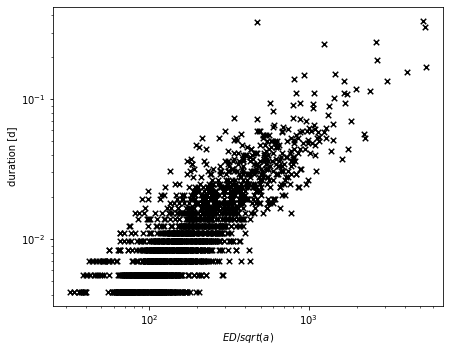

In [81]:
%matplotlib inline
plt.figure(figsize=(7,5.5))
plt.scatter(df.ed_rec/(df.ampl_rec**(2/3)), df.dur, marker="x",s=30, c="k")

slope, intercept, r_value, p_value, std_err = stats.linregress(

plt.xscale("log")
plt.yscale("log")
plt.ylabel("duration [d]")
plt.xlabel(rf"$ED/sqrt(a)$")
# plt.ylim(0.,0.03);

In [ ]:
def func(x1, x2, a):
    return x1 / (x2**a)

In [ ]:
x = (df.ed_rec/(df.ampl_rec**(2/3))).values
y = df.dur.values

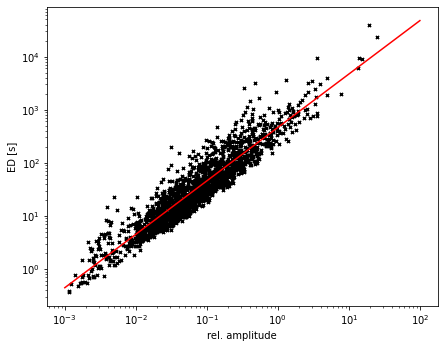

In [65]:
%matplotlib inline
plt.figure(figsize=(7,5.5))
plt.scatter(df.ampl_rec, df.ed_rec, marker="x",s=10, c="k")

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df.ampl_rec.values),
                                                               np.log10(df.ed_rec.values))
x = np.linspace(-3,2,50)
y = x * slope + intercept
plt.plot(10**x,10**y,c="r")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("rel. amplitude")
plt.ylabel("ED [s]");

1. get a from ED
2. fwhm from a and ED